# 0. Module

## 0-1. 설치

In [ ]:
# Install SAM
!pip install git+https://github.com/facebookresearch/segment-anything.git

## 0-2. Modules

In [ ]:
# Library
import numpy as np
import torch
import matplotlib.pyplot as plt
import cv2

from segment_anything import sam_model_registry, SamPredictor

In [ ]:
# Visulaize mask
def show_mask(mask: np.ndarray, ax: plt.axes, random_color: bool =False)-> None:
    # 임의의 색상 사용할 경우
    if random_color:
        color = np.concatenate([np.random.random(3), np.array([0.6])], axis=0)
    else:
        color = np.array([30/255, 144/255, 255/255, 0.6])

    h, w = mask.shape[-2:]
    mask_image = mask.reshape(h, w, 1) * color.reshape(1,1,-1)
    ax.imshow(mask_image)

In [20]:
# Visualize label
def show_points(coords: np.ndarray, labels: np.ndarray, ax: plt.axes, marker_size: int =375)-> None:
    pos_points = coords[labels==1]
    neg_points = coords[labels==0]
    ax.scatter(pos_points[:, 0], pos_points[:, 1], color='green', marker='*', s=marker_size, edgecolor='white', linewidth=1.25)
    ax.scatter(neg_points[:, 0], neg_points[:, 1], color='red', marker='*', s=marker_size, edgecolor='white', linewidth=1.25)

In [8]:
# 상자 시각화
def show_box(box:np.ndarray, ax: plt.axes)-> None:
    x0, y0 = box[0], box[1]
    w, h = box[2] - box[0], box[3] - box[1]
    ax.add_patch(plt.Rectangle((x0, y0), w, h, edgecolor='green', facecolor=(0,0,0,0), lw=2))

# 1. SAM

## 1-1. Sample image

In [ ]:
# 사진 불러오기
image = cv2.imread('sample.jpeg')
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

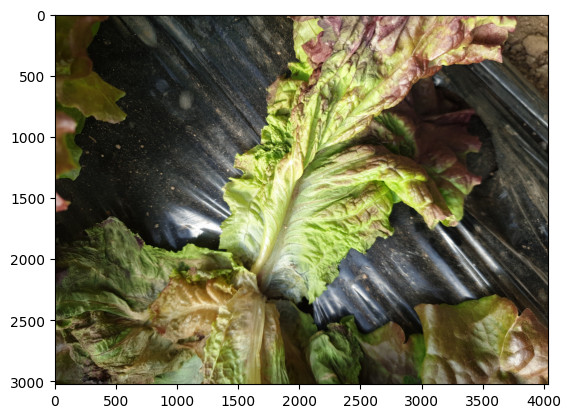

In [10]:
# 사진 시각화
plt.imshow(image)
plt.show()

## 1-2. 추론

In [ ]:
# SAM model info
sam_checkpoint = './weights/sam_vit_h_4b8939.pth'
model_type = 'vit_h'

# 장치
device = 'cuda'

In [ ]:
# 모형 불러오기
sam = sam_model_registry[model_type](checkpoint=sam_checkpoint)
# 모형 장치 연결
sam.to(device=device)

predictor = SamPredictor(sam)

In [14]:
# 전처리
predictor.set_image(image)

In [ ]:
# Prompt
input_point = np.array([[500, 375]])
input_label = np.array([1])

In [16]:
# 결과
masks, scores, logits = predictor.predict(point_coords=input_point, point_labels=input_label, multimask_output=True)

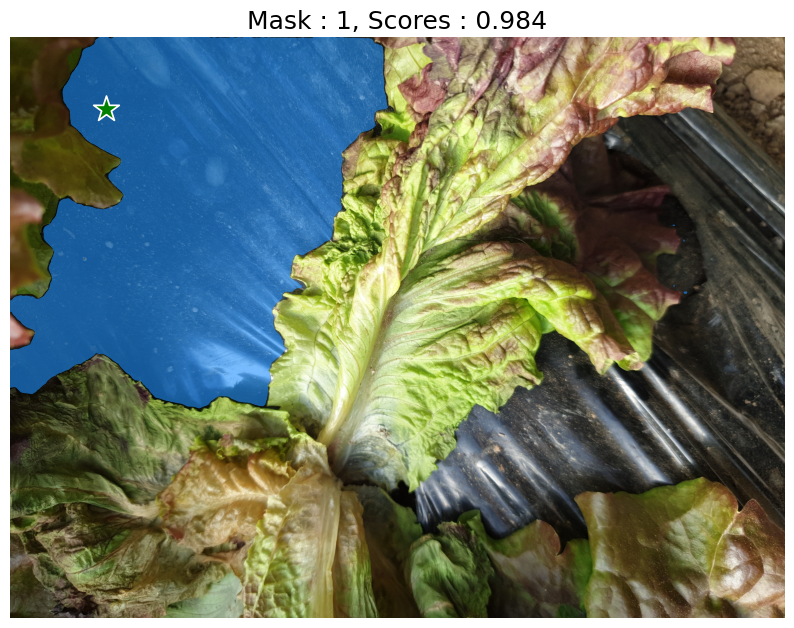

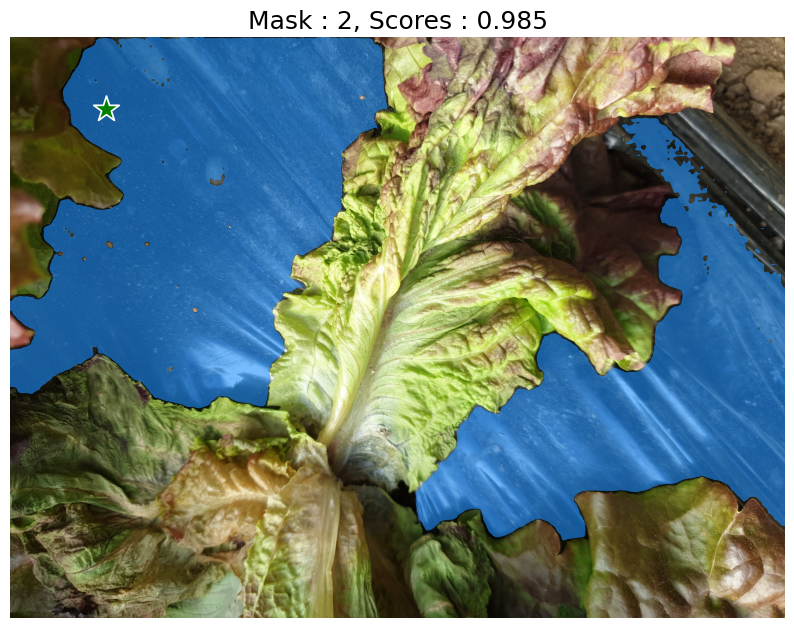

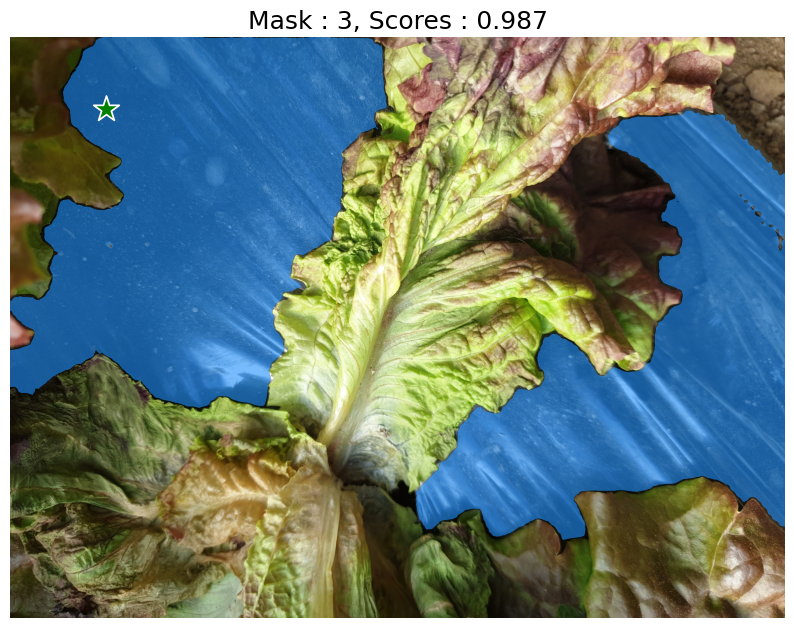

In [21]:
# 시각화
for i, (mask, score) in enumerate(zip(masks, scores)):
    plt.figure(figsize=(10,10))
    plt.imshow(image)
    show_mask(mask, plt.gca())
    show_points(input_point, input_label, plt.gca())
    plt.title(f'Mask : {i+1}, Scores : {score:.3f}', fontsize=18)
    plt.axis('off')
    plt.show()